# Time Series Analysis using MLPForecast

This notebook demonstrates how to use the `mlpforecast` library for time series analysis. We will go through the following steps:


## 1. Importing Necessary Libraries

We start by importing the necessary libraries and setting up the plotting style.


In [3]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib
import matplotlib.pyplot as plt

az.style.use(["science", "arviz-doc", "tableau-colorblind10", "no-latex"])
nice_fonts = {
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.05,
    "axes.labelsize": 8,
    "font.size": 8,
    "legend.fontsize": 8,
    "legend.frameon": False,
}
matplotlib.rcParams.update(nice_fonts)
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats(
    "svg", "pdf", "retina"
)  # For export

In [4]:
data = pd.read_parquet("../data/albania_res.parquet")
data.index = pd.to_datetime(data.index, utc="UTC")

In [6]:
weather_variable = ["Temperature", "Humidity", "Rain"]

## Correlation analysis

In [9]:
from mlpforecast.stats.corr import CorrelationAnalyzer

In [10]:
corr = CorrelationAnalyzer()
chart = corr.corr(
    data,
    weather_variable,
    "NetLoad(MWh)",
    method="scatter",
    hue_col="Season",
    n_sample=1000,
)
chart

alt.RepeatChart(...)

<Axes: >

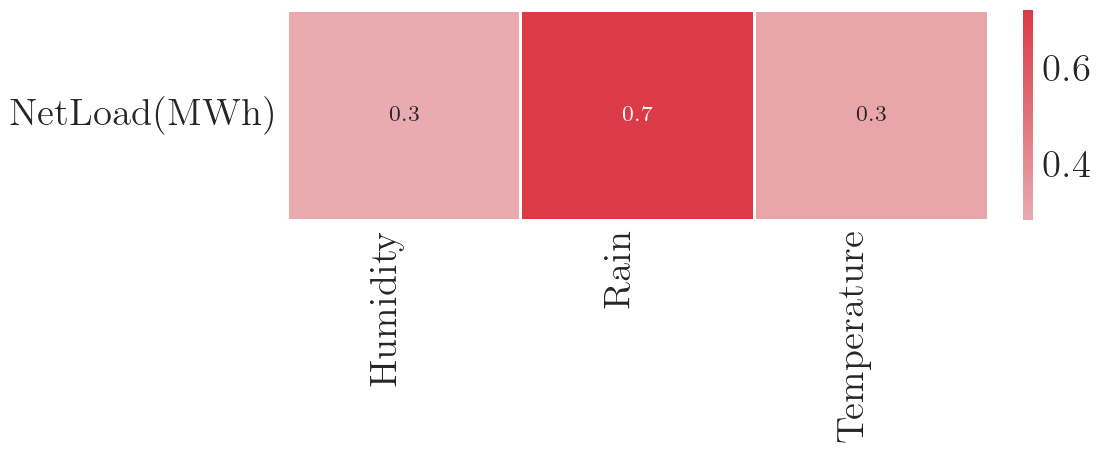

In [14]:
res = corr.corr(data, weather_variable, "NetLoad(MWh)", method="xicor")
fig, ax = plt.subplots(1, 1, figsize=(5.5, 2.25))
corr.plot(ax, res)

<Axes: >

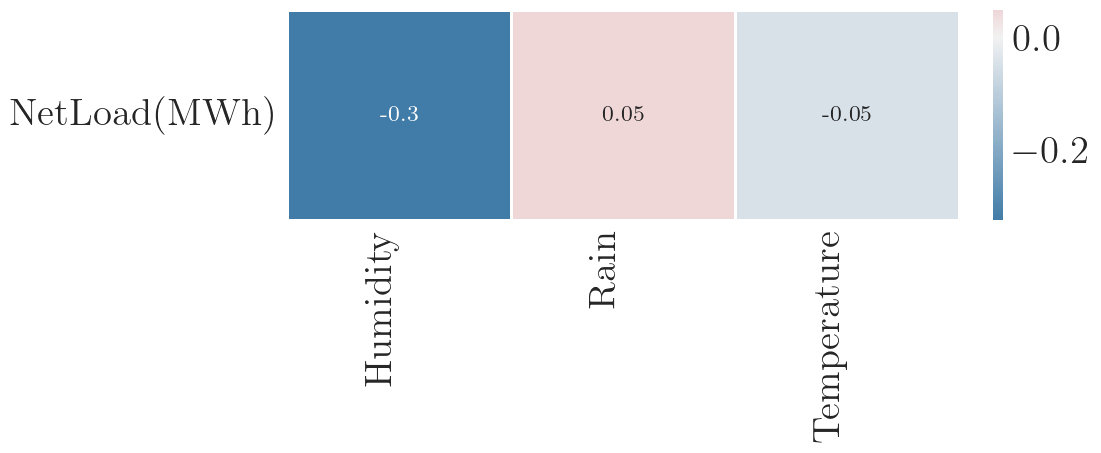

In [15]:
res = corr.corr(data, weather_variable, "NetLoad(MWh)", method="pearson")
fig, ax = plt.subplots(1, 1, figsize=(5.5, 2.25))
corr.plot(ax, res)

<Axes: >

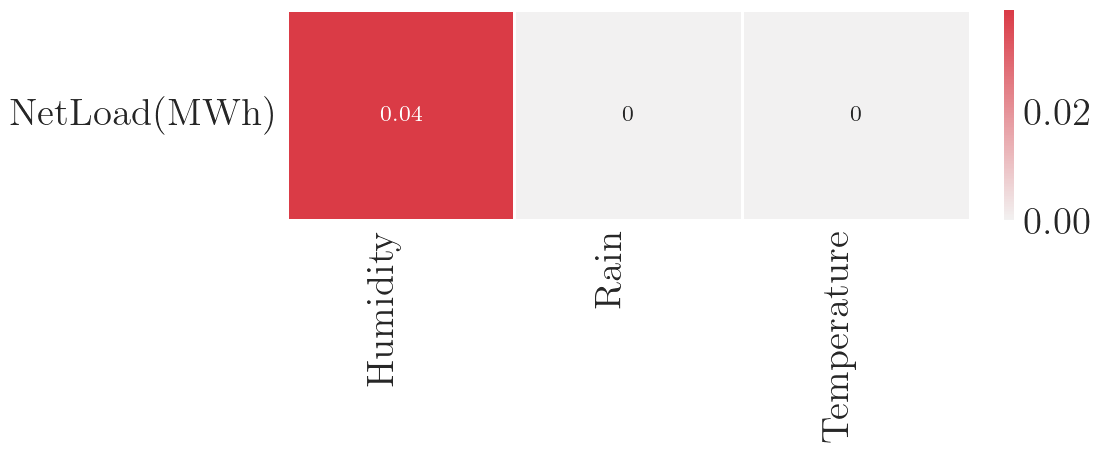

In [17]:
res = corr.corr(data, weather_variable, "NetLoad(MWh)", method="ppscore")
fig, ax = plt.subplots(1, 1, figsize=(5.5, 2.25))
corr.plot(ax, res)